# 1.2: $d$-dimensional input Lin Reg


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

---------------- 
# Part 0: getting the data


In [2]:
def create_d_d_Data(N,thetas,D,sigmaNoise): 
    Xrange = 10
    ## x are random
    X = np.random.random((N,D+1))*Xrange   
    X [:,0] = 1 # as if we stacked ones to a (N,D)-sized array of X
    ## the "y" (ordinates axis) are y=a.x+b + noise
    y = X @ thetas + np.random.normal(0,sigmaNoise,  (N,1))      # not available in real life
    return X, y

In [3]:
######### data creation #########
seed=42
np.random.seed(seed)
N = 50
D = 6 # for instance, D=6
thetaGT=np.random.random((D+1,1))                                  # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = create_d_d_Data(N,thetaGT,D,sigmaNoise)                     # not available in real life
Ntest=N*2
Xtest, ytest = create_d_d_Data(Ntest,thetaGT,D,sigmaNoise) ## test data

In [4]:
X.shape, y.shape

((50, 7), (50, 1))

In [5]:
# the first component of X is always a 1.
X[:3]

array([[1.        , 6.01115012, 7.08072578, 0.20584494, 9.69909852,
        8.32442641, 2.12339111],
       [1.        , 1.8340451 , 3.04242243, 5.24756432, 4.31945019,
        2.9122914 , 6.11852895],
       [1.        , 2.92144649, 3.66361843, 4.56069984, 7.85175961,
        1.99673782, 5.14234438]])

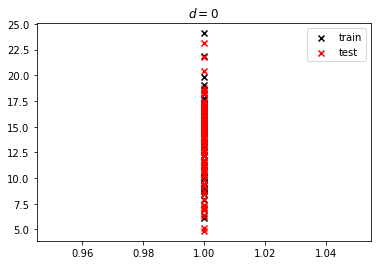

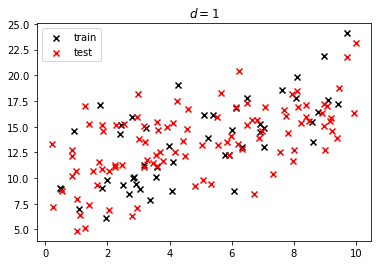

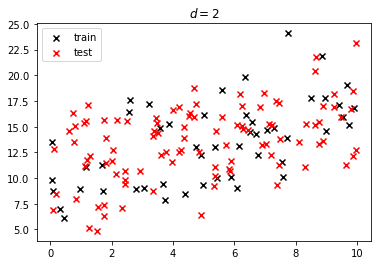

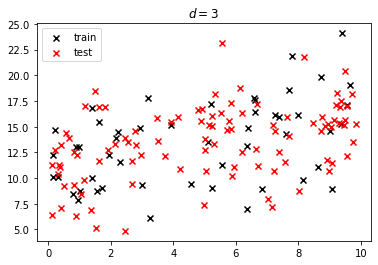

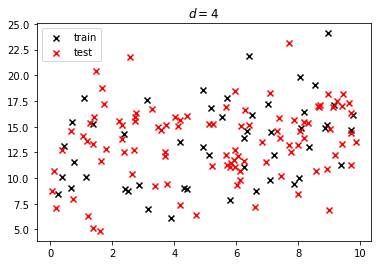

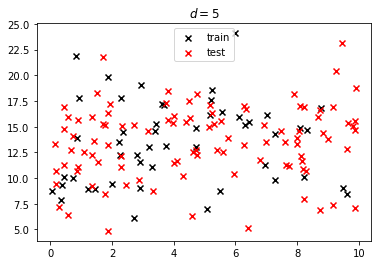

In [6]:
####### data visualization ###########
for d in range (0,D):
    plt.figure()
    plt.title('$d=$'+str(d))
    plt.scatter(X[:,d],y, label="train", marker='x',color='k')
    plt.scatter(Xtest[:,d],ytest, label= "test", marker='x',color='red')
    plt.legend()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [7]:
def model(X, theta):
    ## a simple linear function
    return X @ theta

In [8]:
eta=0.001  # learning rate 
MaxIter = 10000
## initialization (in a sense, a hyper-parameter)
thetaInitial = np.random.random((D+1,1))-0.5 # random initialization 
# plt.plot(X[:,1], model(X, thetaInitial), color='red')

In [9]:
def fit(model, eta, MaxIter, D, theta, X, y):
    trainError = np.zeros(MaxIter)
    testError = np.zeros(MaxIter)
    for iteration in range(MaxIter):
        theta -=  X.T @ ( eta*2.0/N*(model(X, theta) - y)) # /N # this second /N was wrong ! Sorry for the typo !
        trainError[iteration] = np.mean( (model(X, theta)-y)**2 )
        testError[iteration] = np.mean( (model(Xtest, theta)-ytest)**2 )
    return theta, trainError, testError

In [10]:
theta = thetaInitial.copy()
theta, trainError, testError = fit(model, eta, MaxIter, D, theta, X, y)
## even cleaner, we could use a class model, and there would be a method fit in it.
## for now we go slowly with python..

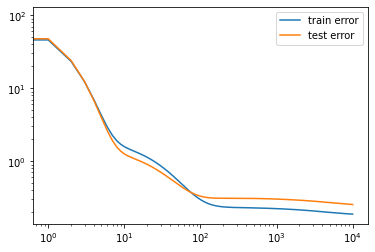

In [11]:
plt.loglog(trainError, label= "train error")
plt.loglog(testError, label= "test error")
plt.legend()

In [12]:
theta / thetaGT    ,    theta - thetaGT

(array([[0.72323761],
        [1.04670313],
        [0.99731267],
        [0.94387789],
        [0.97256836],
        [1.20471295],
        [0.98855746]]),
 array([[-0.10365862],
        [ 0.04440133],
        [-0.00196711],
        [-0.03359797],
        [-0.00427985],
        [ 0.0319341 ],
        [-0.00066462]]))